---

For a positive integer $k$, a *k-colouring* of a graph $G = (V, E)$ is a function $f: V \to \{1, 2, \ldots, k \}$ such that if $\{u, v\} \in E$ is any edge of $G$, then $f(u) \neq f(v)$. In other words, it is an assignment of the "colours" $1$ up to $k$ to the vertices of $G$ such that no neighbouring vertices share a colour. The smallest $k$ for which this is possible, i.e. the smallest number of colours required, is called the *chromatic number* of $G$. 

Finding the chromatic number of a graph is an $NP$-hard problem, and determining whether the chromatic number is equal to $k$ (for some $k > 2$) is $NP$-complete; both of these are with relation to the number of vertices or edges.

A *colouring* of a graph is a $k$-colouring, for some $k \geq 1$.
    
Colouring graphs has applications in scheduling and in compilers, among many other things. You typically want to use as few colours as possible in these applications, as the colours represent resources.
    
The most famous appearance of graph colouring is in the Four-Colour Theorem, which states that any graph which can be drawn in the plane without overlapping edges requires at most $4$ colours; the known proofs of this are all computer-based.

A simple method to find a colouring of a graph, with vertices $\{0, 1, \ldots, n - 1\}$, is the following *greedy* algorithm:

1. For $v$ in `0, 1, 2, ..., n - 1`:
    1. Find the smallest colour (positive integer) $m$ which is not a colour of any neighbour of $v$.
    2. Assign $m$ as the colour of $v$.
    
Implement the method above as a function `greedy_colouring` which takes a networkx `Graph` `G` (with vertices $\{0, 1, \ldots, n - 1\}$) and returns a `list` `C` of the colours of `G`, where `C[i]` is the colour of vertex $i$.
    
<p style='text-align:right;'> <b> [3 Marks] </b> </p>

As a test, the Hoffman-Singleton graph (`nx.hoffman_singleton_graph()`) should require 6 colours using this method.
If you have a graph `G`, you can draw it with coloured vertices using the code below: 
 
```python
ten_colours = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE',
               '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD']
nx.draw_networkx(G, 
                 node_color=[ten_colours[i - 1] for i in greedy_colouring(G)],
                 with_labels=False)
```
These ten colours are [Paul Tol's](https://personal.sron.nl/~pault/) muted colour scheme, designed with colour-blindness in mind; if you want to draw examples of graphs with more than ten colours you will have to extend the list. Vertex labels are omitted here.

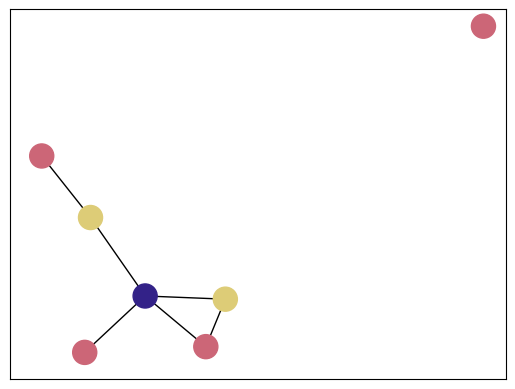

In [7]:
import numpy as np
import networkx as nx

G = nx.Graph()
G.add_nodes_from(range(7))
G.add_edges_from([{0, 2}, {3, 2}, {6, 2}, {4, 2}, {5, 6}, {3,4}])
            
def greedy_colouring(G):
    colours = np.zeros(G.number_of_nodes(), dtype = int)
    for v in G:
        neighbours = np.array(G[v])
        used_colours = []
        for i in neighbours:
            if colours[i] != 0:
                used_colours.append(colours[i])
        j = 1
        while j in used_colours:
            j = j + 1
        colours[v] = j
    return(colours)

greedy_colouring(G)        
    
ten_colours = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE',
               '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD']
nx.draw_networkx(G, 
                 node_color=[ten_colours[i - 1] for i in greedy_colouring(G)],
                 with_labels=False)

 Both of the following arguments are **incorrect**. Explain why; please be clear and brief!

**(a)** In the introduction, it was claimed that finding the chromatic number of a graph is $NP$-complete. However, the greedy colouring algorithm works in polynomial time and the chromatic number is the maximum colour used by it, which can be found in linear time. Hence $P = NP$.

**(b)** Here is an algorithm for testing whether the chromatic number is $3$:
    
```
1. For each function f: V -> {1, 2, 3}, test if it defines a colouring.
2. If there was any such f which did define a colouring using three colours,
   but there was none using only one or two colours, then return True
3. Otherwise return False
```
    
There are $3^{|V|}$ such functions $f$, so the number of steps taken by this algorithm grows faster than any polynomial. This means that the decision problem "is the chromatic number of $G$ equal to 3?" is not in $P$. In the introduction we said that this problem is $NP$-complete, so it certainly is in $NP$. Hence $P \neq NP$.


In [9]:
# (a) Since the chromatic number of a graph is NP-complete, it implies that if there is a solution, it can be verified in polynomial time. But there may be graphs for which a solution does not exist. Thus, we cannot say that the problem can be solved in polynomial time for all graphs and NP is not equal to P.

# (b) All the colourings do not need to be checked to determine whether the chromatic number is 3. Thus, a more efficient solution exists that may be in P.

One way of refining the greedy algorithm is to sort the vertices in descending order of degree before colouring them. This is a *heuristic* which may reduce the number of colours required; the idea is that high-degree vertices will be the most difficult ones to colour if you leave them until the end.

**(a)** Update your function `greedy_colouring` above so that it has an additional optional keyword argument `use_heuristic` with default value `False`, which determines whether it uses the heuristic.

<font size="4" >


**(b)** Generate 1000 random Erdős–Rényi graphs with $100$ vertices and edge-probability $0.2$. For each one, calculate the difference in the number of colours used with and without the heuristic. Make a good histogram of these differences, and comment briefly on it.

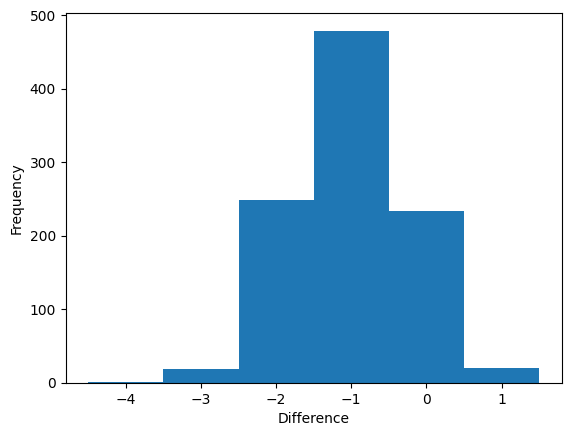

In [10]:
def sort_function(G):
    vertices = list(G.nodes())
    sorted_vertices = np.zeros(G.number_of_nodes(), dtype=int)
    degrees = np.zeros(G.number_of_nodes(), dtype=int)
    for i in range(0, G.number_of_nodes()):
        degrees[i] = G.degree[i]
    indices = np.argsort(degrees)
    for j in range(0, G.number_of_nodes()):
        sorted_vertices[j] = vertices[indices[j]]
    sorted_vertices = sorted_vertices[::-1]
    return sorted_vertices

def greedy_colouring(G, use_heuristic=False):
    colours = np.zeros(G.number_of_nodes(), dtype = int)   
    if use_heuristic:
        G1 = sort_function(G)
    else:
        G1 = G.nodes()
    for v in G1:
        neighbours = np.array(G[v])
        used_colours = []
        for i in neighbours:
            if colours[i] != 0:
                used_colours.append(colours[i])
        j = 1
        while j in used_colours:
            j = j + 1
        colours[v] = j
    return(colours)

difference = []

for i in range(1000):
    Graph = nx.erdos_renyi_graph(100, 0.2)
    heur_false = greedy_colouring(Graph, use_heuristic=False)
    heur_true = greedy_colouring(Graph, use_heuristic=True)
    difference.append(max(heur_true)-max(heur_false))

import matplotlib.pyplot as plt

bins = np.arange(min(difference)-0.5, max(difference)+0.5+1,1)

plt.hist(difference, bins = bins)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()


In [11]:
# Using the heuristic and sorting the nodes in descending order according to their degree is improving the efficiency by, on average, reducing the maximum number of colours used.